### In this tutorial, we will use ```mne``` to load ```.cnt``` file

- author: Wei Liu
- Date: May 11, 2021
- [BCMI lab, Shanghai Jiao Tong University](http://bcmi.sjtu.edu.cn)

For more information about ```mne```, please go to website: [https://mne.tools/stable/index.html](https://mne.tools/stable/index.html)

In [1]:
import os.path as op
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import mne

print(np.__version__)
print(mne.__version__)

%matplotlib qt

1.20.3
1.0.3


In [2]:
# use mne to load the file "6_3_20180802.cnt"
eeg_raw = mne.io.read_raw_cnt('6_3_20180802.cnt')
print(eeg_raw)
print('\n')
print(eeg_raw.info)

<RawCNT | 6_3_20180802.cnt, 66 x 3117520 (3117.5 s), ~68 kB, data not loaded>


<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2018-02-08 02:46:51 UTC
 nchan: 66
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>


In [3]:
# check channel names
ch_names = eeg_raw.ch_names
print(ch_names)
print(len(ch_names))
print('\n')

# drop non-used channels
useless_ch = ['M1', 'M2', 'VEO', 'HEO']
eeg_raw.drop_channels(useless_ch)
new_ch = eeg_raw.ch_names
print(new_ch)
print(len(new_ch))
print('\n')

['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'VEO', 'HEO']
66


['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']
62




Using matplotlib as 2D backend.
Opening raw-browser...


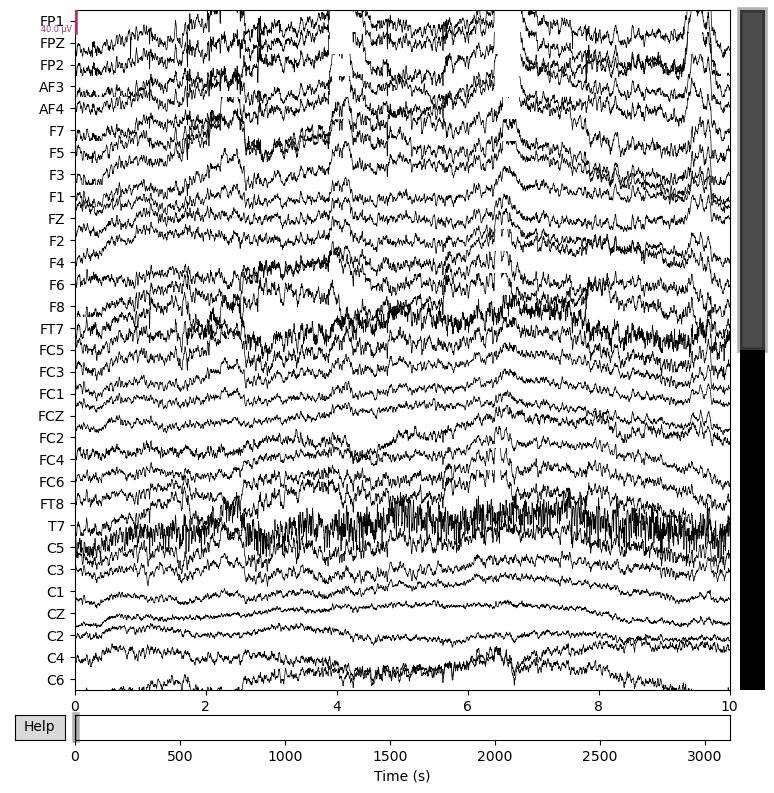

Closing raw-browser...
Channels marked as bad:
none


In [4]:
# see raw data wave
eeg_raw.plot(n_channels=31)

Reading 0 ... 291000  =      0.000 ...   291.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Opening raw-browser...


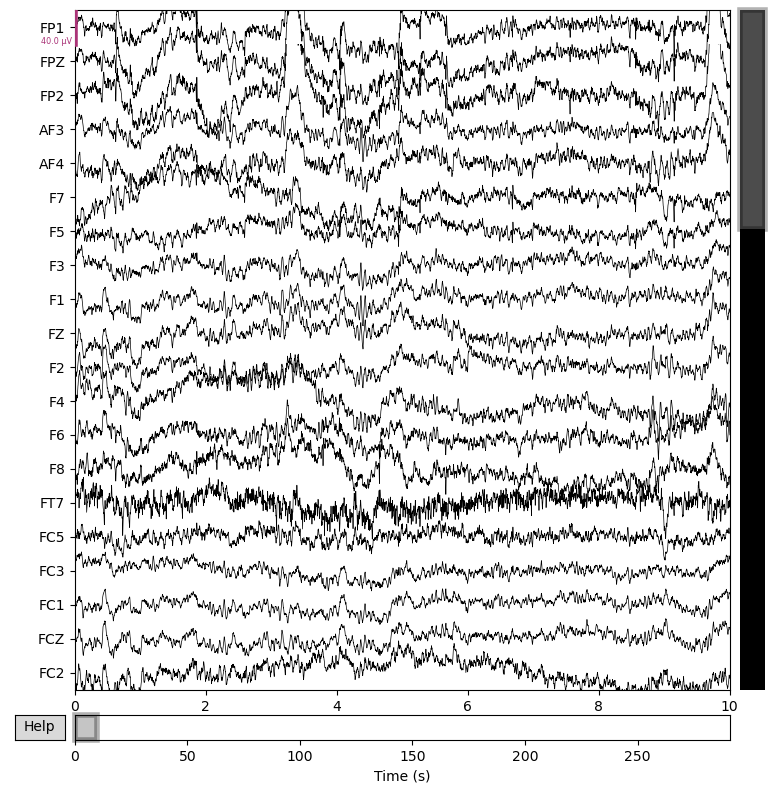

Closing raw-browser...
Channels marked as bad:
none


In [5]:
## first trial 30 ~ 321 second 
eeg_raw.crop(tmin=30, tmax=321).load_data()
#eeg_raw.set_channel_types({'HEO': 'eog', 'VEO': 'eog'})

# use the average of all channels as reference
raw_avg_ref = eeg_raw.copy().set_eeg_reference(ref_channels='average')
raw_avg_ref.plot()

In [6]:
# get the data matrix
data_matrix = eeg_raw.get_data()
print(data_matrix.shape)

(62, 291001)


In [7]:
# with file "trial_start_end_timestamp.txt", you can split the data into different trials
start_second = [30, 353, 478, 674, 825, 908, 1200, 1346, 1451, 1711, 2055, 2307, 2457, 2726, 2888]
end_second = [321, 418, 643, 764, 877, 1147, 1284, 1418, 1679, 1996, 2275, 2425, 2664, 2857, 3066]

###########################################################
### Notice: we did not filt the orignal signal here #######
### you may need to filt the data before other process ####
### To filt the signal, please refer to MNE documents #####
###########################################################
start_second = [30, 353, 478, 674, 825, 908, 1200, 1346, 1451, 1711, 2055, 2307, 2457, 2726, 2888]
end_second = [321, 418, 643, 764, 877, 1147, 1284, 1418, 1679, 1996, 2275, 2425, 2664, 2857, 3066]
sample_freq = 1000

data_trial_1 = data_matrix[:, start_second[0]*1000 : end_second[0]*1000]
data_trial_5 = data_matrix[:, start_second[4]*1000 : end_second[4]*1000]
data_trial_15 = data_matrix[:, start_second[14]*1000 : end_second[14]*1000]

print(data_trial_1.shape)
print(data_trial_5.shape)
print(data_trial_15.shape)

(62, 261001)
(62, 0)
(62, 0)


With the extract clips, you can extract any features.

Effective window size : 2.048 (s)


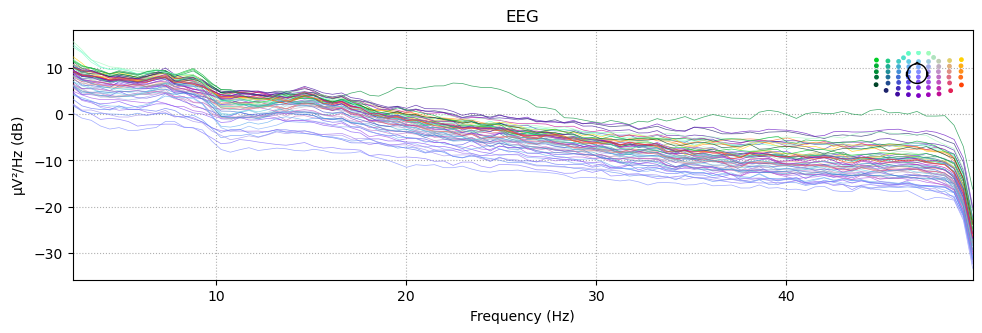

In [8]:
mne.viz.plot_raw_psd(eeg_raw, fmin=2, fmax=50)

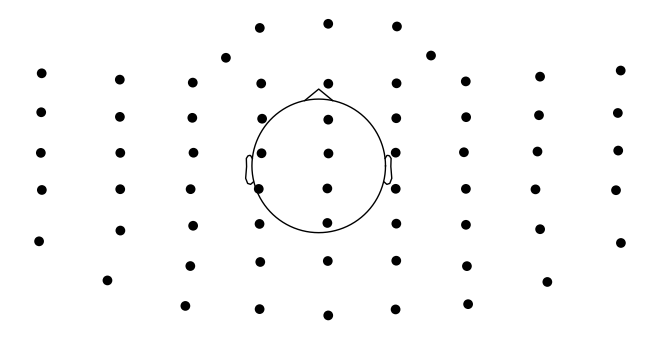

In [9]:
mne.viz.plot_sensors(eeg_raw.info)

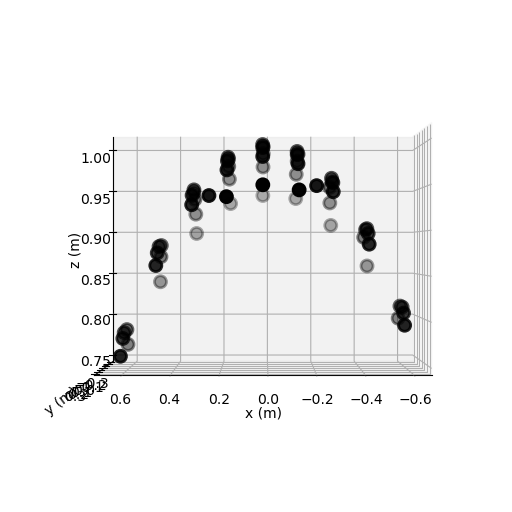

In [10]:
eeg_raw.plot_sensors(kind='3d')

Effective window size : 2.048 (s)


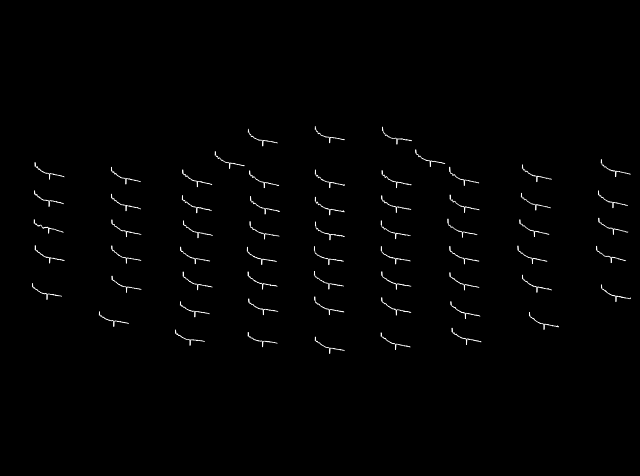

In [11]:
eeg_raw.plot_psd_topo()

# Topoplot

In [12]:
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
n_channels = len(biosemi_montage.ch_names)
fake_info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=250.,
                            ch_types='eeg')

rng = np.random.RandomState(0)
data = rng.normal(size=(n_channels, 1)) * 1e-6
fake_evoked = mne.EvokedArray(data, fake_info)
fake_evoked.set_montage(biosemi_montage)

<Evoked | '' (average, N=1), 0 – 0 sec, baseline off, 64 ch, ~90 kB>

In [13]:
# first we obtain the 3d positions of selected channels
chs = ['Oz', 'Fpz', 'T7', 'T8']
# when the montage is set, it is transformed to the "head" coordinate frame
# that MNE uses internally, therefore we need to use
# ``fake_evoked.get_montage()`` to get these properly transformed coordinates
montage_head = fake_evoked.get_montage()
ch_pos = montage_head.get_positions()['ch_pos']
pos = np.stack([ch_pos[ch] for ch in chs])

# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
radius = np.abs(pos[[2, 3], 0]).mean()

# then we obtain the x, y, z sphere center this way:
# x: x position of the Oz channel (should be very close to 0)
# y: y position of the T8 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()

# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

['0.00000', '0.00000', '0.03683', '0.09494']


In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[0],
                     show=False)
mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[1],
                     show=False, sphere=(x, y, z, radius))

# add titles
ax[0].set_title('MNE', fontweight='bold')
ax[1].set_title('EEGLAB', fontweight='bold')

Text(0.5, 1.0, 'EEGLAB')

# Epoching

In [20]:
events = mne.make_fixed_length_events(eeg_raw, start=0, stop=291, duration=291)
epochs = mne.Epochs(eeg_raw, events, tmin=0, tmax=291, baseline=(0, 0))

Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


Using data from preloaded Raw for 1 events and 291001 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\seokbeom\AppData\Local\Temp/ipykernel_5360/3681733102.py:1: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  epochs.plot_psd_topomap()


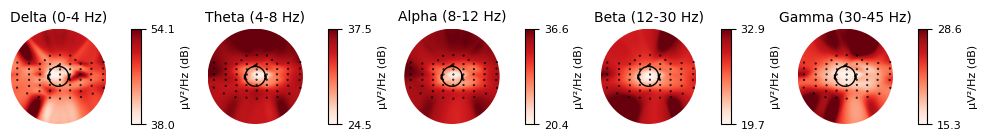

In [21]:
epochs.plot_psd_topomap()

In [23]:
epochs.plot_image()

Using data from preloaded Raw for 1 events and 291001 original time points ...
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


IndexError: list index out of range

In [24]:
freqs = np.logspace(*np.log10([6, 35]), num=8)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

NameError: name 'tfr_morlet' is not defined

In [ ]:
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
#power.plot([82], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[82])

fig, axis = plt.subplots(1, 2, figsize=(7, 4))
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[0],
                   title='Alpha', show=False)
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=13, fmax=25,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[1],
                   title='Beta', show=False)
mne.viz.tight_layout()
plt.show()

In [19]:
itc.plot_topo(title='Inter-Trial coherence', vmin=0., vmax=1., cmap='Reds')

NameError: name 'itc' is not defined